# Basic Intro to Machine Learning - Regression
Using the The Ames Housing dataset compiled by Dean De Cock.

In this notebook, we will look at how to apply regression and multiple linear regression.

In [1]:
# Import necessary packages

# Pandas to handle the data
import pandas as pd

# Matplotlib and Seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_theme(style = 'darkgrid')
sns.set_context('notebook')

# Scipy for linear regression
import scipy

# SciKit-Learn for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Part 1: Linear regression on 2 variables

This is just your classing line of best fit. You probably did this way back in high school.

The equation for a line: **y = mx + b**

It can also be written as: **y = b<sub>0</sub>+b<sub>1</sub>X<sub>1</sub>**

### Load Data

In [2]:
included_columns = ['SalePrice','BedroomAbvGr']

data_2var = pd.read_csv('data/housing_data.csv', usecols = included_columns)

### Inspect Data

In [3]:
data_2var

,BedroomAbvGr,SalePrice
0,3,208500
1,3,181500
2,3,223500
3,3,140000
4,4,250000
...,...,...
1455,3,175000
1456,3,210000
1457,4,266500
1458,2,142125


In [4]:
data_2var.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.0,3.0,3.0,8.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


### Plot Data

[Text(0.5, 1.0, 'Sale Price vs # of Bedrooms Above Grade')]

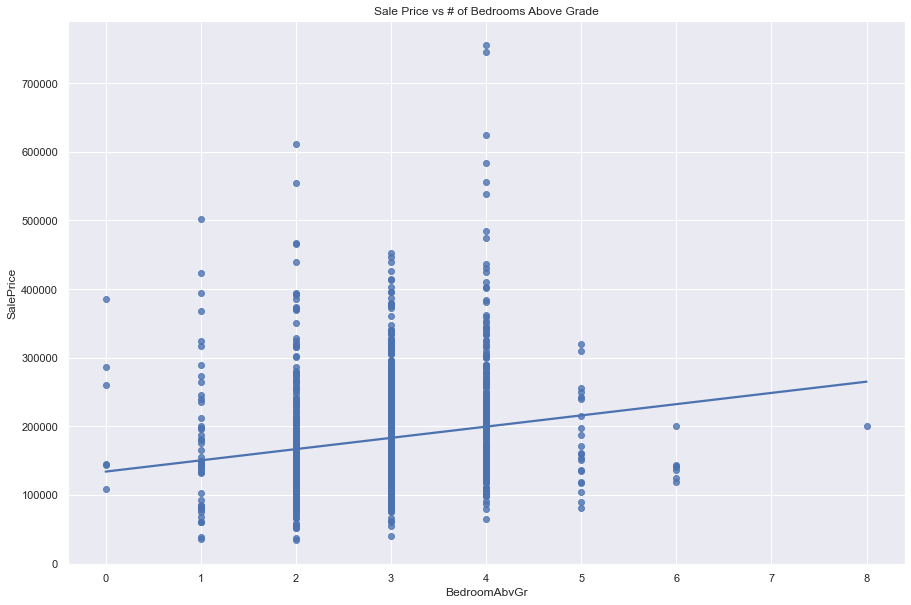

In [5]:
fig, ax = plt.subplots(figsize = (15,10))

#sns.scatterplot(data = data_2var, x = 'BedroomAbvGr', y = 'SalePrice', ci=None).set(title = 'Sale Price vs # of Bedrooms Above Grade')
sns.regplot(data = data_2var, x = 'BedroomAbvGr', y = 'SalePrice', ci=None).set(title = 'Sale Price vs # of Bedrooms Above Grade')

### Calculate line of best fit

In [6]:
# Estimate a line of best fit using Scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x = data_2var['BedroomAbvGr'], y = data_2var['SalePrice'])

print('Line of best fit in the form y = mx + b')
print(f'y = {slope:.2f}x + {intercept:.2f}')

r_squared = r_value**2

print(f'R-squared: {r_squared:.4f}')
print('\nThis can easily be verified in Excel using charting techniques most will be familiar with')

Line of best fit in the form y = mx + b
y = 16381.02x + 133966.02
R-squared: 0.0283

This can easily be verified in Excel using charting techniques most will be familiar with


### Create model for line of best fit using SciKit-Learn

In [7]:
# Create 'Machine Learning' model for line of best fit using SciKit-Learn

# Let X represent your features
X = data_2var['BedroomAbvGr'].values.reshape(-1, 1)    #.values.reshape(-1, 1) needed since we only have one variable

# Let y represent the target variable
y = data_2var['SalePrice']

reg = LinearRegression().fit(X,y)

def print_model_results():
    print(f'Coefficients: {reg.coef_}')
    print(f'Intercept: {reg.intercept_}')

    # Calculate R^2 score and mean squared error for ML model
    y_pred = reg.predict(X)

    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y,y_pred, squared=False)

    print(f'R^2 score of ML model: {r2:.4f}')
    print(f'RMSE error of ML model: {rmse:.4f}')


print_model_results()


Coefficients: [16381.01698299]
Intercept: 133966.02049739184
R^2 score of ML model: 0.0283
RMSE error of ML model: 78283.6752


## Part 2: Regression on 3 variables  - Multiple Linear Regression

For multiple linear regression, the function you are trying to create is the same as the function for a line, but now it has more variables and coefficients.
<br>The function can be written as: **y = b<sub>0</sub>+b<sub>1</sub>X<sub>1</sub>+b<sub>2</sub>X<sub>2</sub>+ ... + b<sub>n</sub>X<sub>n</sub>**

### Load Data

In [8]:
included_columns = ['SalePrice','BedroomAbvGr','GrLivArea']

data_3var = pd.read_csv('data/housing_data.csv', usecols = included_columns)

### Inspect Data

In [9]:
data_3var

,GrLivArea,BedroomAbvGr,SalePrice
0,1710,3,208500
1,1262,3,181500
2,1786,3,223500
3,1717,3,140000
4,2198,4,250000
...,...,...,...
1455,1647,3,175000
1456,2073,3,210000
1457,2340,4,266500
1458,1078,2,142125


In [10]:
data_3var.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.5,1464.0,1776.75,5642.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.0,3.0,3.00,8.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.00,755000.0


### Plot Data

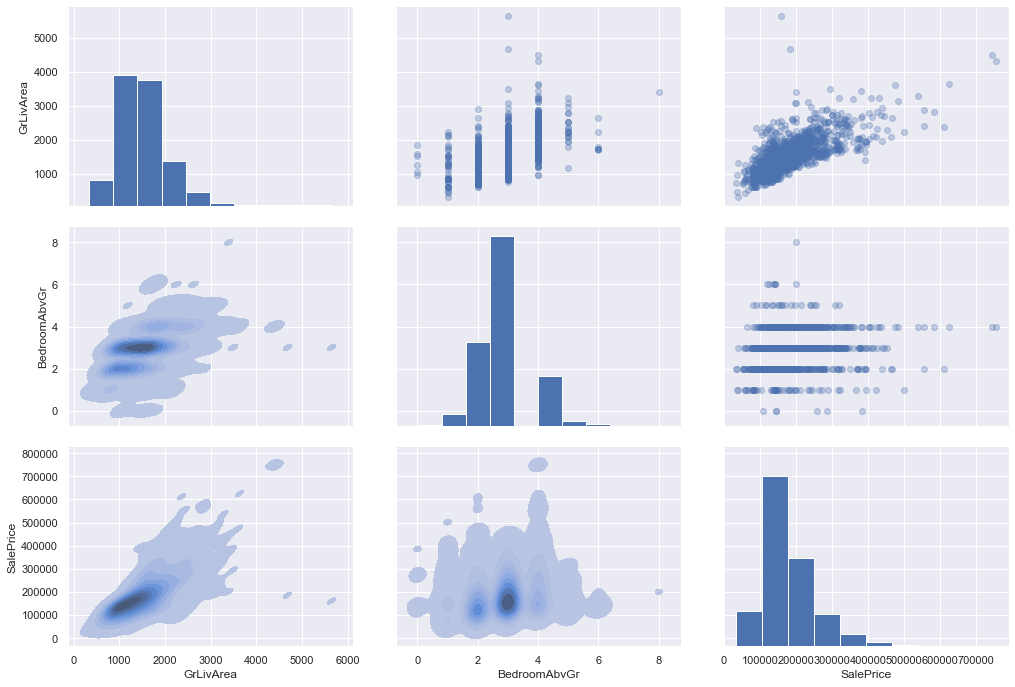

In [11]:
g = sns.PairGrid(data_3var)
g.map_diag(plt.hist)
g.map_upper(plt.scatter, alpha=0.3)
g.map_lower(sns.kdeplot,fill=True, thresh = 0.01)
g.fig.set_size_inches(15,10)

Text(0.5, 0.92, 'Housing Prices')

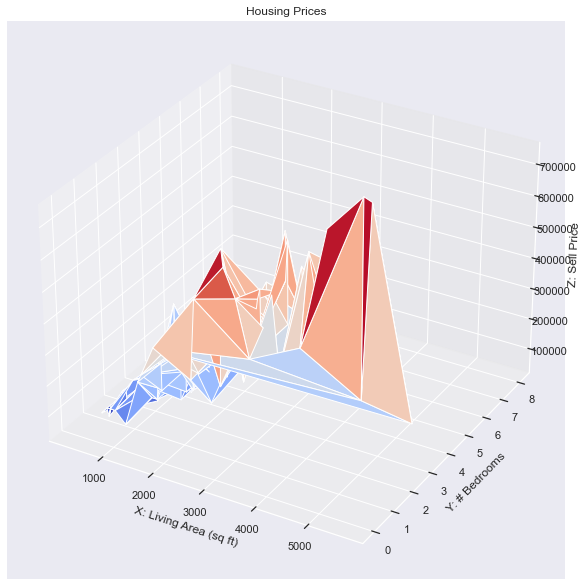

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10,15))

X = data_3var['GrLivArea']
Y = data_3var['BedroomAbvGr']
Z = data_3var['SalePrice']

surf = ax.plot_trisurf(X,Y,Z, cmap = plt.cm.coolwarm, linewidth = 1, antialiased = True)

ax.set_xlabel('X: Living Area (sq ft)')
ax.set_ylabel('Y: # Bedrooms')
ax.set_zlabel('Z: Sell Price')

ax.set_title('Housing Prices')


### Create model


... BUT scipy does not support multivariable regression 🤔


So, we will just use SciKit-Learn's Linear Regression

In [13]:
# Create 'Machine Learning' model using SciKit-Learn

# Let X represent your features
X = data_3var[['BedroomAbvGr','GrLivArea']]    #.values.reshape(-1, 1) needed since we only have one variable

# Let y represent the target variable
y = data_3var['SalePrice']

reg = LinearRegression().fit(X,y)

print_model_results()

Coefficients: [-26899.82296069    128.8987961 ]
Intercept: 62686.433917525195
R^2 score of ML model: 0.5577
RMSE error of ML model: 52814.5804


## Part 3: What about 4 variables?

In [14]:
included_columns = ['SalePrice','BedroomAbvGr','GrLivArea','OverallQual']

data_4var = pd.read_csv('data/housing_data.csv', usecols = included_columns)

# Create 'Machine Learning' model using SciKit-Learn

# Let X represent your features
X = data_4var[['BedroomAbvGr','GrLivArea','OverallQual']]    #.values.reshape(-1, 1) needed since we only have one variable

# Let y represent the target variable
y = data_4var['SalePrice']

reg = LinearRegression().fit(X,y)

print_model_results()

Coefficients: [-12144.22535656     69.26695705  30557.07357584]
Intercept: -75616.90897280938
R^2 score of ML model: 0.7245
RMSE error of ML model: 41686.0698


## Now we're ready to throw all the variables in!

### Load data

In [15]:
data_all = pd.read_csv('data/housing_data.csv')

### Inspect data
81 columns - this looks a little more complicated now 🤯
<br>It's the same process as above, but now we need to think about data cleaning, feature selection, and feature engineering. More about that another time...

In [16]:
data_all

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
